# Random Forest Demonstration
## Overview
We are using a Random Forest Classifier to predict the volatility regimes in the markets. In short, the random forest is known as the "black box" algorithm. It constructs multiple decision trees that output a classiefier prediction and randomizes each tree to protect against overfitting of the data. The result of all the individual trees becomes our random forest prediction. 


## Vol_Data class example

### FRED IDs with labels:

DCOILBRENTEU: European Brent Oil Prices

BAMLH0A0HYM2: US high yield index option-adjusted spread

GOLDAMGBD228NLBM: Gold fixing price in London Bullion

DAAA: Moody's corporate bond yield

RIFSPPFAAD01NB: Overnight commercial paper interest rate

BAMLHE00EHYIOAS: Euro high yield index option-adjusted spread

T10Y3M:10 year treasury bond minus 3 month treasury bond

BAMLEMFSFCRPITRIV:Emerging markets corporate bond yields

### Other data 
GDX_Volume: Weekly Volume of the GDX etf, which tracks gold miners

SHY_Volume: Weekly Volume of the SHY etf, which is a 1-3 yr treasury bond fund

SPY_Volume: Weekly Volume of the SPY etf, representing the S&P500

In [1]:
from Code.Data.Inputs import volClass #imports volClass file which contains Vol_Data
#fred IDs to access Fred data
fred_s = ["DCOILBRENTEU","BAMLH0A0HYM2", "GOLDAMGBD228NLBM","DAAA","RIFSPPFAAD01NB","BAMLHE00EHYIOAS", "T10Y3M", "BAMLEMFSFCRPITRIV"]

#create vol_data object
# Vol_Data(start_date, end_date = None, fred_strings = None) Notice default for end_date and fred_strings is None
trial_vol = volClass.Vol_Data("2007-01-01", fred_strings = fred_s)

C:\Users\Vincent\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
from Code.Data import rfClass

# Regime_Predict(Vol_Data object, test_size = .3, n_estimators= 10) we chose default test data size as .3 and n_estimators for random forest as 10
trial_regime_prediction = rfClass.Regime_Predict(trial_vol)

In [3]:
trial_regime_prediction.corr

,DCOILBRENTEU,BAMLH0A0HYM2,GOLDAMGBD228NLBM,DAAA,RIFSPPFAAD01NB,BAMLHE00EHYIOAS,T10Y3M,BAMLEMFSFCRPITRIV,SPY_Volume,SHY_Volume,GDX_Volume
DCOILBRENTEU,1.000000,-0.157526,0.270024,0.280281,-0.104712,-0.031744,0.351017,-0.325097,0.131745,-0.244366,-0.513753
BAMLH0A0HYM2,-0.157526,1.000000,-0.230324,0.368757,-0.284644,0.970498,0.416800,-0.577812,0.710306,-0.001069,-0.257542
GOLDAMGBD228NLBM,0.270024,-0.230324,1.000000,-0.726908,-0.573349,-0.173005,-0.009627,0.554986,-0.265750,0.218342,0.234129
DAAA,0.280281,0.368757,-0.726908,1.000000,0.323608,0.399040,0.442271,-0.880172,0.557469,-0.324885,-0.625571
RIFSPPFAAD01NB,-0.104712,-0.284644,-0.573349,0.323608,1.000000,-0.295646,-0.678382,-0.156874,-0.050575,-0.040096,-0.212671
BAMLHE00EHYIOAS,-0.031744,0.970498,-0.173005,0.399040,-0.295646,1.000000,0.452112,-0.621888,0.698860,-0.046518,-0.359856
T10Y3M,0.351017,0.416800,-0.009627,0.442271,-0.678382,0.452112,1.000000,-0.471983,0.402853,-0.236168,-0.263184
BAMLEMFSFCRPITRIV,-0.325097,-0.577812,0.554986,-0.880172,-0.156874,-0.621888,-0.471983,1.000000,-0.665151,0.360468,0.726498
SPY_Volume,0.131745,0.710306,-0.265750,0.557469,-0.050575,0.698860,0.402853,-0.665151,1.000000,0.041089,-0.393143
SHY_Volume,-0.244366,-0.001069,0.218342,-0.324885,-0.040096,-0.046518,-0.236168,0.360468,0.041089,1.000000,0.359793


In [4]:
trial_regime_prediction.all_prob

,Low_Vol,Med_Vol,High_Vol
Week,,,
2007-01-08,1.0,0.0,0.0
2007-01-16,1.0,0.0,0.0
2007-01-22,1.0,0.0,0.0
2007-01-29,1.0,0.0,0.0
2007-02-05,1.0,0.0,0.0
...,...,...,...
2020-06-01,0.3,0.0,0.7
2020-06-08,0.2,0.0,0.8
2020-06-15,0.0,0.0,1.0


In [5]:
trial_regime_prediction.all_predictions_df

,Vol_Regime
Week,
2007-01-08,-1
2007-01-16,-1
2007-01-22,-1
2007-01-29,-1
2007-02-05,-1
...,...
2020-06-01,1
2020-06-08,1
2020-06-15,1


In [6]:
trial_regime_prediction.Regime_Accuracy()

The accuracy of our model to predict the right category is: 
0.858%


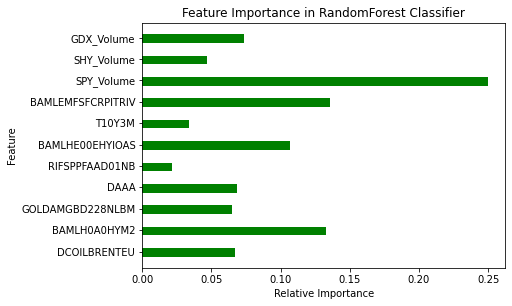

<Figure size 360x360 with 0 Axes>

Feature ranking:
1. feature 8 (0.249749)
2. feature 7 (0.135565)
3. feature 1 (0.132941)
4. feature 5 (0.106656)
5. feature 10 (0.073578)
6. feature 3 (0.068724)
7. feature 0 (0.066740)
8. feature 2 (0.064501)
9. feature 9 (0.046793)
10. feature 6 (0.033627)
11. feature 4 (0.021125)


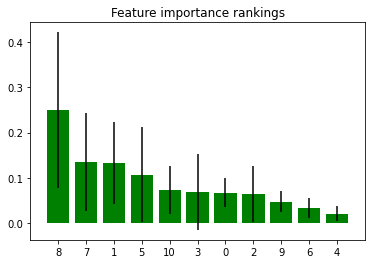

In [7]:
trial_regime_prediction.plot_feature_importances()

trial_regime_prediction.plot_feature_rankings()

This graph illustrates which of the factors we used, and the relative significance of them in our actual predictions.

In [8]:
trial_regime_prediction.classification_report()

              precision    recall  f1-score   support

          -1       0.88      0.96      0.91       135
           0       0.80      0.59      0.68        54
           1       0.84      0.91      0.87        23

    accuracy                           0.86       212
   macro avg       0.84      0.82      0.82       212
weighted avg       0.85      0.86      0.85       212



### Classification Report

Precision: TP / TP + FP -- Out of all the positive classes we have predicted correctly, how many are positive. 

Recall: TP / TP + FN -- Out of all positive classes, how much we have predicted correctly. 

f1-score: Weighted average between precision and recall scores

Support: Number of occurences of each label in the true data set. 

Macro and weighted avg look at the data holistically, and then makes the same calculations - weighted is similar to macro, but accounts for label imbalance, by taking the weighted mean of the metrics for each data label, where macro takes an unweighted mean. 


### Confusion Matrix
This visualizes the classification report, showing which were correctly predicted, as well as the False Positives and False Negatives.

Confusion Matrix: 


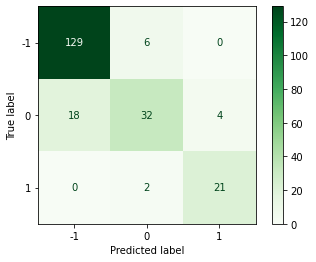

In [9]:
trial_regime_prediction.confusion_matrix()

In [10]:
trial_regime_prediction.best_params()

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.0min finished


{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': None}


In [11]:
optimal_regime_pred = rfClass.Regime_Predict(trial_vol, n_estimators = 200, max_features = 'sqrt', max_depth = None)

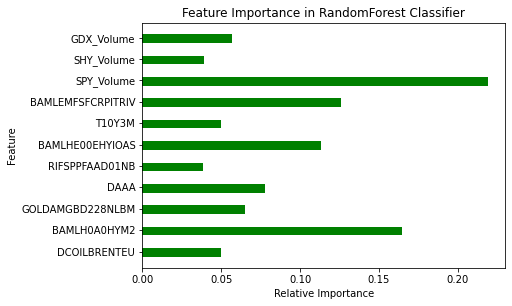

<Figure size 360x360 with 0 Axes>

Feature ranking:
1. feature 8 (0.218956)
2. feature 1 (0.164762)
3. feature 7 (0.125776)
4. feature 5 (0.113370)
5. feature 3 (0.078046)
6. feature 2 (0.065040)
7. feature 10 (0.056865)
8. feature 0 (0.050056)
9. feature 6 (0.049680)
10. feature 9 (0.038810)
11. feature 4 (0.038637)


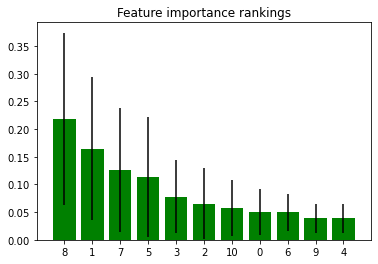

In [12]:
optimal_regime_pred.plot_feature_importances()
optimal_regime_pred.plot_feature_rankings()

In [13]:
optimal_regime_pred.classification_report()

              precision    recall  f1-score   support

          -1       0.90      0.93      0.92       137
           0       0.73      0.67      0.70        48
           1       0.88      0.85      0.87        27

    accuracy                           0.86       212
   macro avg       0.84      0.82      0.83       212
weighted avg       0.86      0.86      0.86       212



Confusion Matrix: 


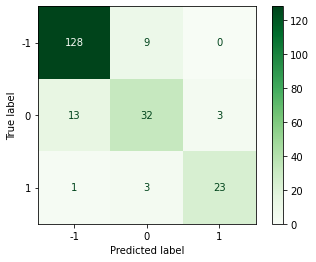

In [14]:
optimal_regime_pred.confusion_matrix()

In [16]:
optimal_regime_pred.Regime_Accuracy()

The accuracy of our model to predict the right category is: 
0.863%
